### Data analysis

In [1]:
import pandas as pd

casting_df = pd.read_csv('data/dataset2.csv')
casting_df.columns = casting_df.iloc[0]
casting_df = casting_df[1:].reset_index(drop=True)
casting_df = casting_df.iloc[2:]

casting_df.head()

,number,date,height_1,height_2,height_3,width_1,width_2,width_3,temp,bed_temp,humidity,layer_count,slicer_layer_height,slicer_layer_width,slicer_nozzle_speed,slicer_extrusion_multiplier
2,3,31.10.2024,"0,65","0,75","0,82","1,75","1,96","1,75","18,5",NaN,41%,1,"0,8","1,5",10,1
3,4,31.10.2024,"0,78","0,87","0,84","2,21","1,77","2,14","18,5",NaN,41%,1,"0,8","1,5",10,1
4,5,31.10.2024,"0,86","0,78","0,89","1,96","1,85","1,93","18,5",NaN,41%,1,"0,8","1,5",10,1
5,6,31.10.2024,"0,85","0,86","0,98","2,17","1,93","1,9","18,5",NaN,41%,1,"0,8","1,5",10,1
6,7,31.10.2024,"0,81","0,94","0,91","2,25","2,05","2,07","18,5",NaN,41%,1,"0,8","1,5",10,1


In [2]:
casting_df.drop(columns=['bed_temp', 'date', 'number', 'layer_count'], inplace=True)
casting_df['humidity'] = casting_df['humidity'].str.rstrip('%').astype('float') / 100.0

casting_df.dropna(inplace=True)

# Replace commas with dots and convert to float
casting_df = casting_df.map(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else float(x))

casting_df.head()

,height_1,height_2,height_3,width_1,width_2,width_3,temp,humidity,slicer_layer_height,slicer_layer_width,slicer_nozzle_speed,slicer_extrusion_multiplier
2,0.65,0.75,0.82,1.75,1.96,1.75,18.5,0.41,0.8,1.5,10.0,1.0
3,0.78,0.87,0.84,2.21,1.77,2.14,18.5,0.41,0.8,1.5,10.0,1.0
4,0.86,0.78,0.89,1.96,1.85,1.93,18.5,0.41,0.8,1.5,10.0,1.0
5,0.85,0.86,0.98,2.17,1.93,1.90,18.5,0.41,0.8,1.5,10.0,1.0
6,0.81,0.94,0.91,2.25,2.05,2.07,18.5,0.41,0.8,1.5,10.0,1.0


In [3]:
len(casting_df)

66

In [ ]:
# casting_df.to_csv('data/cleaned_df.csv', index=False)

In [4]:
# Calculate average values for height and width
casting_df['height_average'] = (casting_df['height_1'] + casting_df['height_2'] + casting_df['height_3'])/3
casting_df['width_average'] = (casting_df['width_1'] + casting_df['width_2'] + casting_df['width_3'])/3

# Calculate average difference values for height and width
casting_df['avg_height_diff'] = casting_df['height_average']-casting_df['slicer_layer_height']
casting_df['avg_width_diff'] = casting_df['width_average']-casting_df['slicer_layer_width']
casting_df['avg_diff'] = (casting_df['avg_height_diff']+casting_df['avg_width_diff'])/2

Overall data distribution

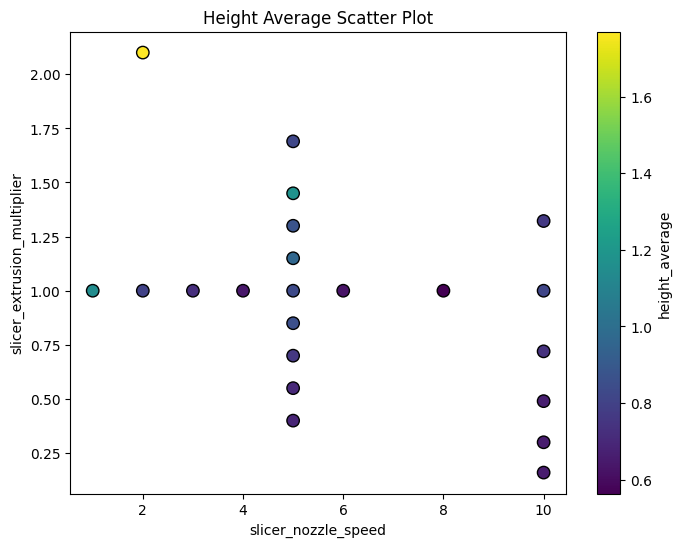

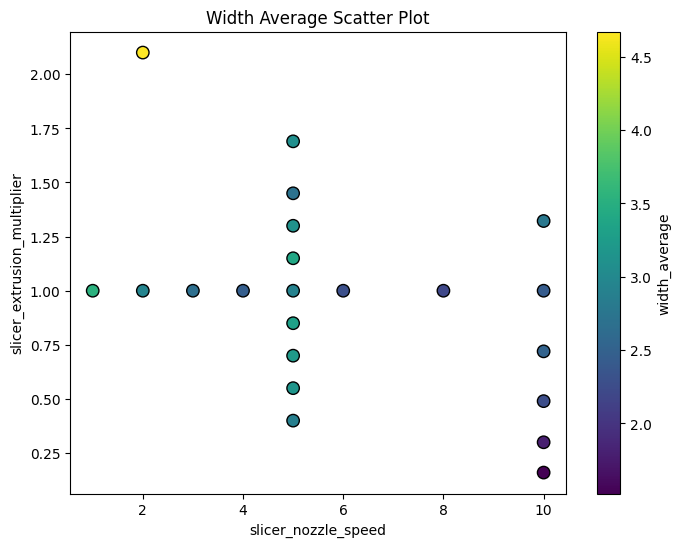

In [41]:
import matplotlib.pyplot as plt

# Group by input features and compute the mean output
casting_df_grouped = casting_df.groupby(['slicer_nozzle_speed', 'slicer_extrusion_multiplier'], as_index=False).mean()

# Function to create scatter plot
def plot_scatter(df, x, y, z, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df[x], df[y], c=df[z], cmap='viridis', edgecolor='k', s=80)
    plt.colorbar(scatter, label=z)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gca()
    plt.show()

# Scatter plots for both outputs using the averaged values
plot_scatter(casting_df_grouped, 'slicer_nozzle_speed', 'slicer_extrusion_multiplier', 'height_average', 'Height Average Scatter Plot')
plot_scatter(casting_df_grouped, 'slicer_nozzle_speed', 'slicer_extrusion_multiplier', 'width_average', 'Width Average Scatter Plot')



Don't think that the next cell is very informative but let it be here

In [ ]:
import matplotlib.pyplot as plt

# Group by 'temp', 'slicer_nozzle_speed', and 'slicer_extrusion_multiplier', taking the mean of 'avg_diff'
avg_diff_df = casting_df.groupby(['temp', 'slicer_nozzle_speed', 'slicer_extrusion_multiplier'], as_index=False).mean()

# Get unique temperatures
unique_temps = avg_diff_df['temp'].unique()

# Create a plot for each unique temp value
plt.figure(figsize=(10, 5 * len(unique_temps)))
for i, temp in enumerate(unique_temps, start=1):
    plt.subplot(len(unique_temps), 1, i)
    
    # Filter DataFrame for the current temp
    temp_df = avg_diff_df[avg_diff_df['temp'] == temp]
    
    # Create scatter plot with color based on 'avg_diff'
    scatter = plt.scatter(
        x=temp_df['slicer_nozzle_speed'],
        y=temp_df['slicer_extrusion_multiplier'],
        c=temp_df['avg_diff'],
        cmap='viridis',
        edgecolor='k',
        s=100
    )
    
    # Set plot title and labels
    plt.title(f'Temperature: {temp}°C')
    plt.xlabel('Slicer Nozzle Speed')
    plt.ylabel('Slicer Extrusion Multiplier')
    
    # Add color bar for 'avg_diff' values
    cbar = plt.colorbar(scatter)
    cbar.set_label('Avg Diff')

# Adjust layout
plt.tight_layout()
plt.show()

Here I think that median is more informative than mean. Not very good results for width actually

In [ ]:
print(f"Min, median and max average height values: {casting_df['height_average'].min()}, {casting_df['height_average'].median()}, {casting_df['height_average'].max()}")
print(f"Min, median and max average width values: {casting_df['width_average'].min()}, {casting_df['width_average'].median()}, {casting_df['width_average'].max()}")
print(f"\nTarget height = {casting_df['slicer_layer_height'].iloc[0]}, target width = {casting_df['slicer_layer_width'].iloc[0]}")

Min, mean and max average height values: 0.5499999999999999, 0.7733333333333334, 2.0666666666666664
Min, mean and max average width values: 1.2666666666666666, 2.5233333333333334, 4.973333333333334

Target height = 0.8, target width = 1.5


### Basic models

Preparation steps

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Define the input and output variables
X = casting_df[['slicer_nozzle_speed', 'slicer_extrusion_multiplier', 'temp']]
y = casting_df[['height_average', 'width_average']]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Model defining

In [25]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor

# GBR
gbr = GradientBoostingRegressor()
gbr_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
gbr_model = {"name": "GBR", "model": gbr, "param_grid": gbr_param_grid}

# GPR
gpr = GaussianProcessRegressor()
gpr_param_grid = {
    'kernel': [j * RBF(length_scale=[i], length_scale_bounds='fixed') for i in [0.1, 0.5, 1, 2, 5, 10] for j in range(1, 5)],
    'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
}
gpr_model = {"name": "GPR", "model": gpr, "param_grid": gpr_param_grid}

# SVM
svr = SVR()
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}
svr_model = {"name": "SVM", "model": svr, "param_grid": svr_param_grid}

# XGBoost
xgb = XGBRegressor(objective='reg:squarederror')
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model = {"name": "XGB", "model": xgb, "param_grid": xgb_param_grid}

# Save models
models = (gbr_model, gpr_model, svr_model, xgb_model)


Model training, evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

models_predictions = []
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for model in models:

        # Use GridSearchCV to optimize hyperparameters for each target independently, default metric is R2
        model_height = GridSearchCV(model["model"], model["param_grid"], cv=cv, scoring='neg_mean_squared_error')
        model_width = GridSearchCV(model["model"], model["param_grid"], cv=cv, scoring='neg_mean_squared_error')

        # Fit the models separately on the training data
        model_height.fit(X_train, y_train['height_average'])
        model_width.fit(X_train, y_train['width_average'])

        # Extract best estimators from GridSearchCV
        best_model_height = model_height.best_estimator_
        best_model_width = model_width.best_estimator_

        # Final predictions on the data
        val_height_preds = best_model_height.predict(X_val)
        val_width_preds = best_model_width.predict(X_val)
        train_height_preds = best_model_height.predict(X_train)
        train_width_preds = best_model_width.predict(X_train)

        # Store predictions
        models_predictions.append({"name": model["name"],
                                "height_predicted": val_height_preds,
                                "width_predicted": val_width_preds})

        # Used MAE for easier interpretation
        train_height_MAE_loss = mean_absolute_error(y_train['height_average'], train_height_preds)
        train_width_MAE_loss = mean_absolute_error(y_train['width_average'], train_width_preds)

        val_height_MAE_loss = mean_absolute_error(y_val['height_average'], val_height_preds)
        val_width_MAE_loss = mean_absolute_error(y_val['width_average'], val_width_preds)

        print(model["name"], "model:")
        print(f"MAE height and width on the train set: {train_height_MAE_loss}, {train_width_MAE_loss}")
        print(f"MAE height and width on the validation set: {val_height_MAE_loss}, {val_width_MAE_loss}\n")

GBR model:
MAE height and width on the train set: 0.08022915002643, 0.09167823019676578
MAE height and width on the validation set: 0.07508339117759857, 0.2312058264754119

GPR model:
MAE height and width on the train set: 0.0864938900037368, 0.18955442690217486
MAE height and width on the validation set: 0.0773424823503884, 0.28252588920190946

SVM model:
MAE height and width on the train set: 0.09990637380258292, 0.19419028649436268
MAE height and width on the validation set: 0.0805792255916323, 0.27850082052933034

XGB model:
MAE height and width on the train set: 0.06758349800455396, 0.11555504885272706
MAE height and width on the validation set: 0.07439590930938719, 0.20433569232622784



In [29]:
y_val['height_predicted'] = val_height_preds
y_val['width_predicted'] = val_width_preds

y_val

,height_average,width_average,height_predicted,width_predicted
59,0.583333,2.476667,0.866153,3.158272
67,0.856667,3.313333,0.745521,3.205554
2,0.740000,1.820000,0.778263,2.068135
50,0.883333,2.513333,0.898351,2.759036
7,1.493333,4.500000,1.691134,4.805929
68,0.756667,3.226667,0.745521,3.205554
18,0.746667,2.210000,0.759275,2.413096
14,0.623333,1.266667,0.641811,1.412378
70,0.690000,2.863333,0.739947,2.847836
33,0.833333,2.530000,0.811710,2.544419


Plot for XGBoost

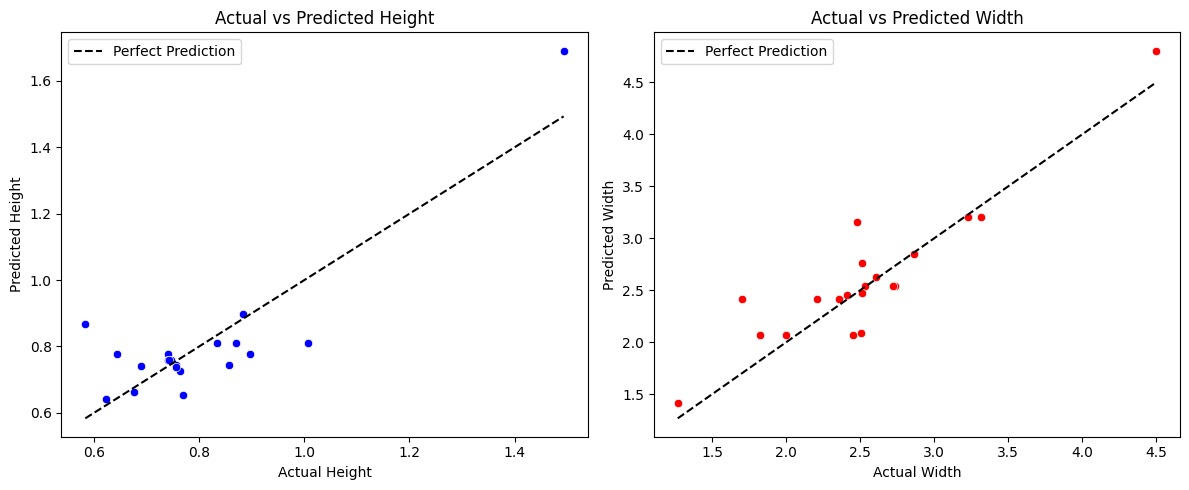

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for height
sns.scatterplot(x=y_val["height_average"], y=y_val["height_predicted"], ax=axes[0], color="blue")
axes[0].plot([y_val["height_average"].min(), y_val["height_average"].max()], 
             [y_val["height_average"].min(), y_val["height_average"].max()], 'k--', label="Perfect Prediction")
axes[0].set_xlabel("Actual Height")
axes[0].set_ylabel("Predicted Height")
axes[0].set_title("Actual vs Predicted Height")
axes[0].legend()

# Scatter plot for width
sns.scatterplot(x=y_val["width_average"], y=y_val["width_predicted"], ax=axes[1], color="red")
axes[1].plot([y_val["width_average"].min(), y_val["width_average"].max()], 
             [y_val["width_average"].min(), y_val["width_average"].max()], 'k--', label="Perfect Prediction")
axes[1].set_xlabel("Actual Width")
axes[1].set_ylabel("Predicted Width")
axes[1].set_title("Actual vs Predicted Width")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()